<a href="https://colab.research.google.com/github/stav-aizik/Food-Image-Classification-CNN/blob/main/Food_10_Multi_Class_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload images
# Download the ZIP file from Google Drive
#https://drive.google.com/file/d/1-329XUOi4XaagdlutAqvPi4yKB-bX9U9/view?usp=drive_link
zip_id = "1-329XUOi4XaagdlutAqvPi4yKB-bX9U9"
!gdown --id {zip_id} -O food_10.zip

# unzip
!unzip food_10.zip -d food_10

Streaming output truncated to the last 5000 lines.
  inflating: food_10/train/greek_salad/3866677.jpg  
  inflating: food_10/train/greek_salad/3799546.jpg  
  inflating: food_10/train/greek_salad/3811010.jpg  
  inflating: food_10/train/greek_salad/3787249.jpg  
  inflating: food_10/train/greek_salad/3832905.jpg  
  inflating: food_10/train/greek_salad/3787847.jpg  
  inflating: food_10/train/greek_salad/3805611.jpg  
  inflating: food_10/train/greek_salad/3784986.jpg  
  inflating: food_10/train/greek_salad/3806676.jpg  
  inflating: food_10/train/greek_salad/3785193.jpg  
  inflating: food_10/train/greek_salad/3880124.jpg  
  inflating: food_10/train/greek_salad/3781278.jpg  
  inflating: food_10/train/greek_salad/383930.jpg  
  inflating: food_10/train/greek_salad/3871112.jpg  
  inflating: food_10/train/greek_salad/3882470.jpg  
  inflating: food_10/train/greek_salad/3872537.jpg  
  inflating: food_10/train/greek_salad/3815541.jpg  
  inflating: food_10/train/greek_salad/3851859.jp

In [ ]:
# Preprocessing and Ingest Data
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop , Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

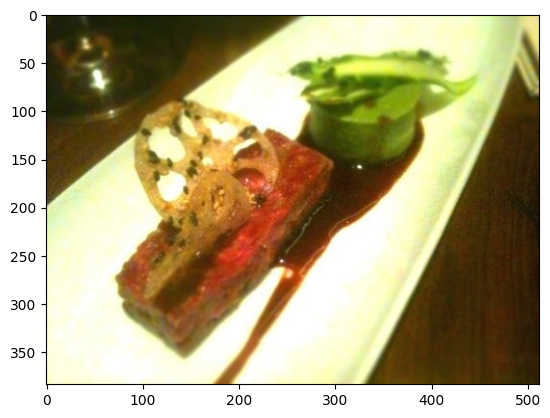

In [ ]:
img_path = 'food_10/train/beef_tartare/101073.jpg'
img = load_img(img_path)
plt.imshow(img)

In [ ]:
img.size

(512, 384)

In [ ]:
#use ImageDataGenerator to create train_datagen and test_datagen
train_datagen = ImageDataGenerator(
    rescale=1./255 ,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_path='food_10/train'
test_path='food_10/test'

In [ ]:
#create train/test generators, make sure to use class_mode='categorical'
#use taret_size 200x200
train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (200,200),
    class_mode = 'categorical',
    batch_size = 32
)
test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (200,200),
    class_mode = 'categorical',
    batch_size = 32
)

Found 8016 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
train_generator.class_indices

{'beef_tartare': 0,
 'churros': 1,
 'french_onion_soup': 2,
 'greek_salad': 3,
 'guacamole': 4,
 'pad_thai': 5,
 'pancakes': 6,
 'pho': 7,
 'strawberry_shortcake': 8,
 'sushi': 9}

In [ ]:
#build a model, use at leasrt one BatchNormalization layer and at least on Dropout layer
#please make sure the SHAPE OF THE OUTPUT LAYER IS CORRECTLY DEFINED
# Build Model
model = tf.keras.Sequential([
    BatchNormalization(),
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPool2D(2, 2),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Compile the Model with RMSprop

In [ ]:
#fit the model 2-3 epochs will do, it is going to be slow..
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 108s 384ms/step - accuracy: 0.1673 - loss: 3.3203 - val_accuracy: 0.2980 - val_loss: 2.1139
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 91s 362ms/step - accuracy: 0.2930 - loss: 1.9691 - val_accuracy: 0.3705 - val_loss: 1.8927
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 88s 351ms/step - accuracy: 0.3524 - loss: 1.8491 - val_accuracy: 0.4385 - val_loss: 1.7286
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 88s 350ms/step - accuracy: 0.3818 - loss: 1.7578 - val_accuracy: 0.4285 - val_loss: 1.7231
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 88s 350ms/step - accuracy: 0.4012 - loss: 1.7307 - val_accuracy: 0.4360 - val_loss: 1.6661
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 145s 361ms/step - accuracy: 0.4196 - loss: 1.6752 - val_accuracy: 0.4450 - val_loss: 1.6625
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 87s 348ms/step - accuracy: 0.4357 - loss: 1.6591 - val_accuracy: 0.4610 - val_loss: 1.5783
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 88s 352ms/step - accuracy: 0.4240 - loss:

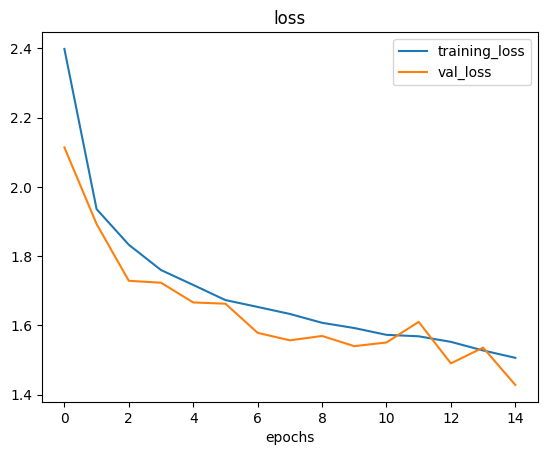

In [ ]:
#plot th eloss and the val_loss

plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training_loss")
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label="val_loss")
plt.title('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5297 - loss: 1.4534
Loss: 1.4278113842010498
Accuracy: 0.5350000262260437


In [ ]:

# Test the model
#try the model on one image
img_path = "food_10/5909225570632321301.jpg"
img = load_img(img_path, target_size=(200, 200))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
prediction = model.predict(img_array)
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: [[0.17057684 0.03893846 0.12324509 0.10876548 0.08772586 0.19899811
  0.04700318 0.05283423 0.01838242 0.15353031]]


In [ ]:
num = np.argmax(prediction)
print(list(train_generator.class_indices.keys())[num])

pad_thai


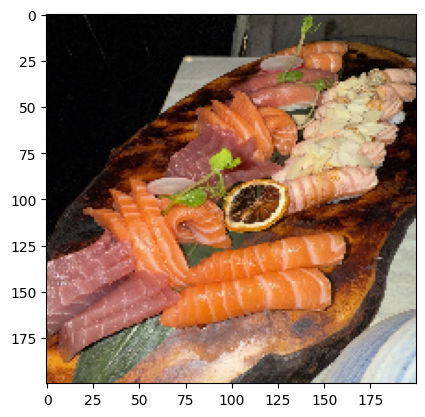

In [ ]:
plt.imshow(img)

In [ ]:
model_2 = tf.keras.Sequential([
    BatchNormalization(),
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPool2D(2, 2),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model_2.fit(
    train_generator,
    epochs=6,
    validation_data=test_generator
)

Epoch 1/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 88s 351ms/step - accuracy: 0.3013 - loss: 1.9175 - val_accuracy: 0.3365 - val_loss: 1.8539
Epoch 2/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 140s 344ms/step - accuracy: 0.3251 - loss: 1.8649 - val_accuracy: 0.3875 - val_loss: 1.7884
Epoch 3/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 89s 353ms/step - accuracy: 0.3495 - loss: 1.7977 - val_accuracy: 0.4000 - val_loss: 1.7440
Epoch 4/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 141s 351ms/step - accuracy: 0.3540 - loss: 1.8032 - val_accuracy: 0.4150 - val_loss: 1.7118
Epoch 5/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 88s 349ms/step - accuracy: 0.3638 - loss: 1.7781 - val_accuracy: 0.4495 - val_loss: 1.7087
Epoch 6/6
251/251 ━━━━━━━━━━━━━━━━━━━━ 88s 349ms/step - accuracy: 0.3803 - loss: 1.7517 - val_accuracy: 0.4400 - val_loss: 1.6391


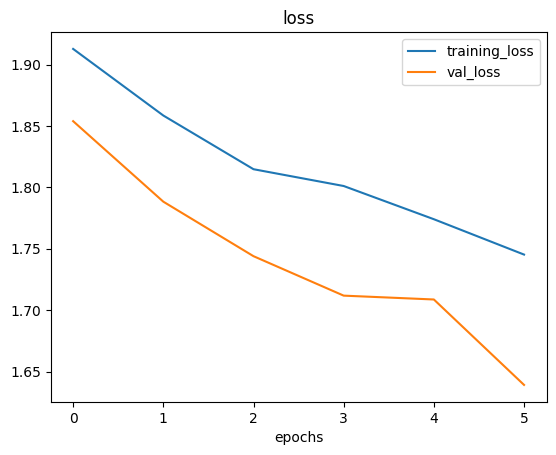

In [ ]:

plt.plot(range(len(history.history['loss'])), history.history['loss'], label="training_loss")
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label="val_loss")
plt.title('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
loss, acc = model_2.evaluate(test_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.4341 - loss: 1.6374
Loss: 1.6391410827636719
Accuracy: 0.4399999976158142


In [ ]:

# Test the model
#try the model on one image
img_path = "food_10/5909225570632321301.jpg"
img = load_img(img_path, target_size=(200, 200))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
prediction = model.predict(img_array)
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: [[0.17057684 0.03893846 0.12324509 0.10876548 0.08772586 0.19899811
  0.04700318 0.05283423 0.01838242 0.15353031]]


In [ ]:
num = np.argmax(prediction)
print(list(train_generator.class_indices.keys())[num])

pad_thai
